In [1]:
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
data = "Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation   learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance."
data

'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation   learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.'

In [3]:
sentences = data.split('.')
sentences = [sentence for sentence in sentences if sentence.strip()]

In [4]:
clean_sent = []
for sentence in sentences:
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
    sentence = re.sub(r'(?:^| )\\w (?:$| )', ' ', sentence).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)

In [6]:
index_to_word = {}
word_to_index = {}

In [7]:
for i, sequence in enumerate(sequences):
    word_in_sentence = clean_sent[i].split()
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

In [8]:
vocab_size = len(tokenizer.word_index) + 1
emb_size = 100 
context_size = 2

In [9]:
contexts = []
targets = []

for sequence in sequences:
    for i in range(1, len(sequence) - 1):
        if i - context_size >= 0 and i + context_size < len(sequence):
            target = sequence[i]
            context = [sequence[i - context_size], sequence[i + context_size]]
            contexts.append(context)
            targets.append(target)

In [10]:
X = np.array(contexts)
Y = np.array(targets)

In [11]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size),  # Removed input_length
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
history = model.fit(X, Y, epochs=100, batch_size=32)


Epoch 1/100

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.0522 - loss: 4.3159
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1616 - loss: 4.2993
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2926 - loss: 4.2824
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3349 - loss: 4.2646
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3228 - loss: 4.2471
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4041 - loss: 4.2262
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4102 - loss: 4.2034
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3612 - loss: 4.1779
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4006 - loss: 4.1464
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3615 - loss: 4.1118 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3402 - loss: 4.0783
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3228 - loss: 4.02

In [14]:
embeddings = model.get_weights()[0]

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

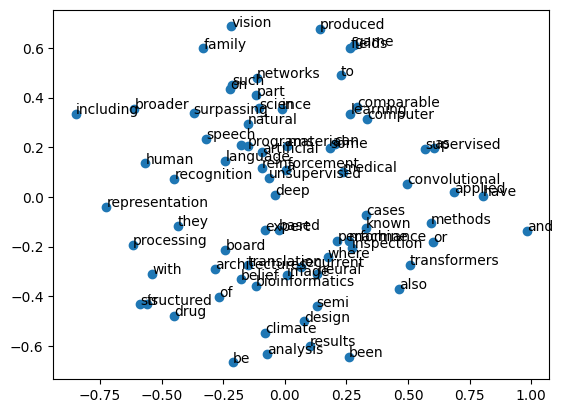

In [16]:
import matplotlib.pyplot as plt
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
for i, word in enumerate(index_to_word.values()):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.show()

In [17]:
test_sentences = [
    "known as structured learning",
    "transformers have applied to",
    "where they produced results",
    "cases surpassing expert performance"
]

for sent in test_sentences:
    test_words = sent.split(" ")
    x_test = []
    for i in test_words:
        # Add a default index for unknown words (e.g., 0 for unknown)
        word_index = word_to_index.get(i, 0)
        x_test.append(word_index)
    
    # Convert the list to a NumPy array
    x_test = np.array([x_test])

    # Predict and display the result
    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred), "\n\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
pred  ['known', 'as', 'structured', 'learning'] 
= deep 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
pred  ['transformers', 'have', 'applied', 'to'] 
= been 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
pred  ['where', 'they', 'produced', 'results'] 
= have 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
pred  ['cases', 'surpassing', 'expert', 'performance'] 
= human 


